In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

# Aufgabe 1

In [2]:
def func1a(x): return -(x**5)
def func1b(x,y): return (25*(x**2) - 10*x*(y**2) + y**4)

In [3]:
n = 10
p = 4
y_interval = np.linspace(-n**p,n**p,100)
x_interval = np.linspace(-n,n,100)


## Aufgabe 1a

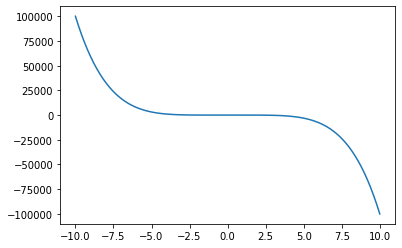

In [4]:
plt.plot(x_interval, func1a(x_interval))

## Aufgabe 1b

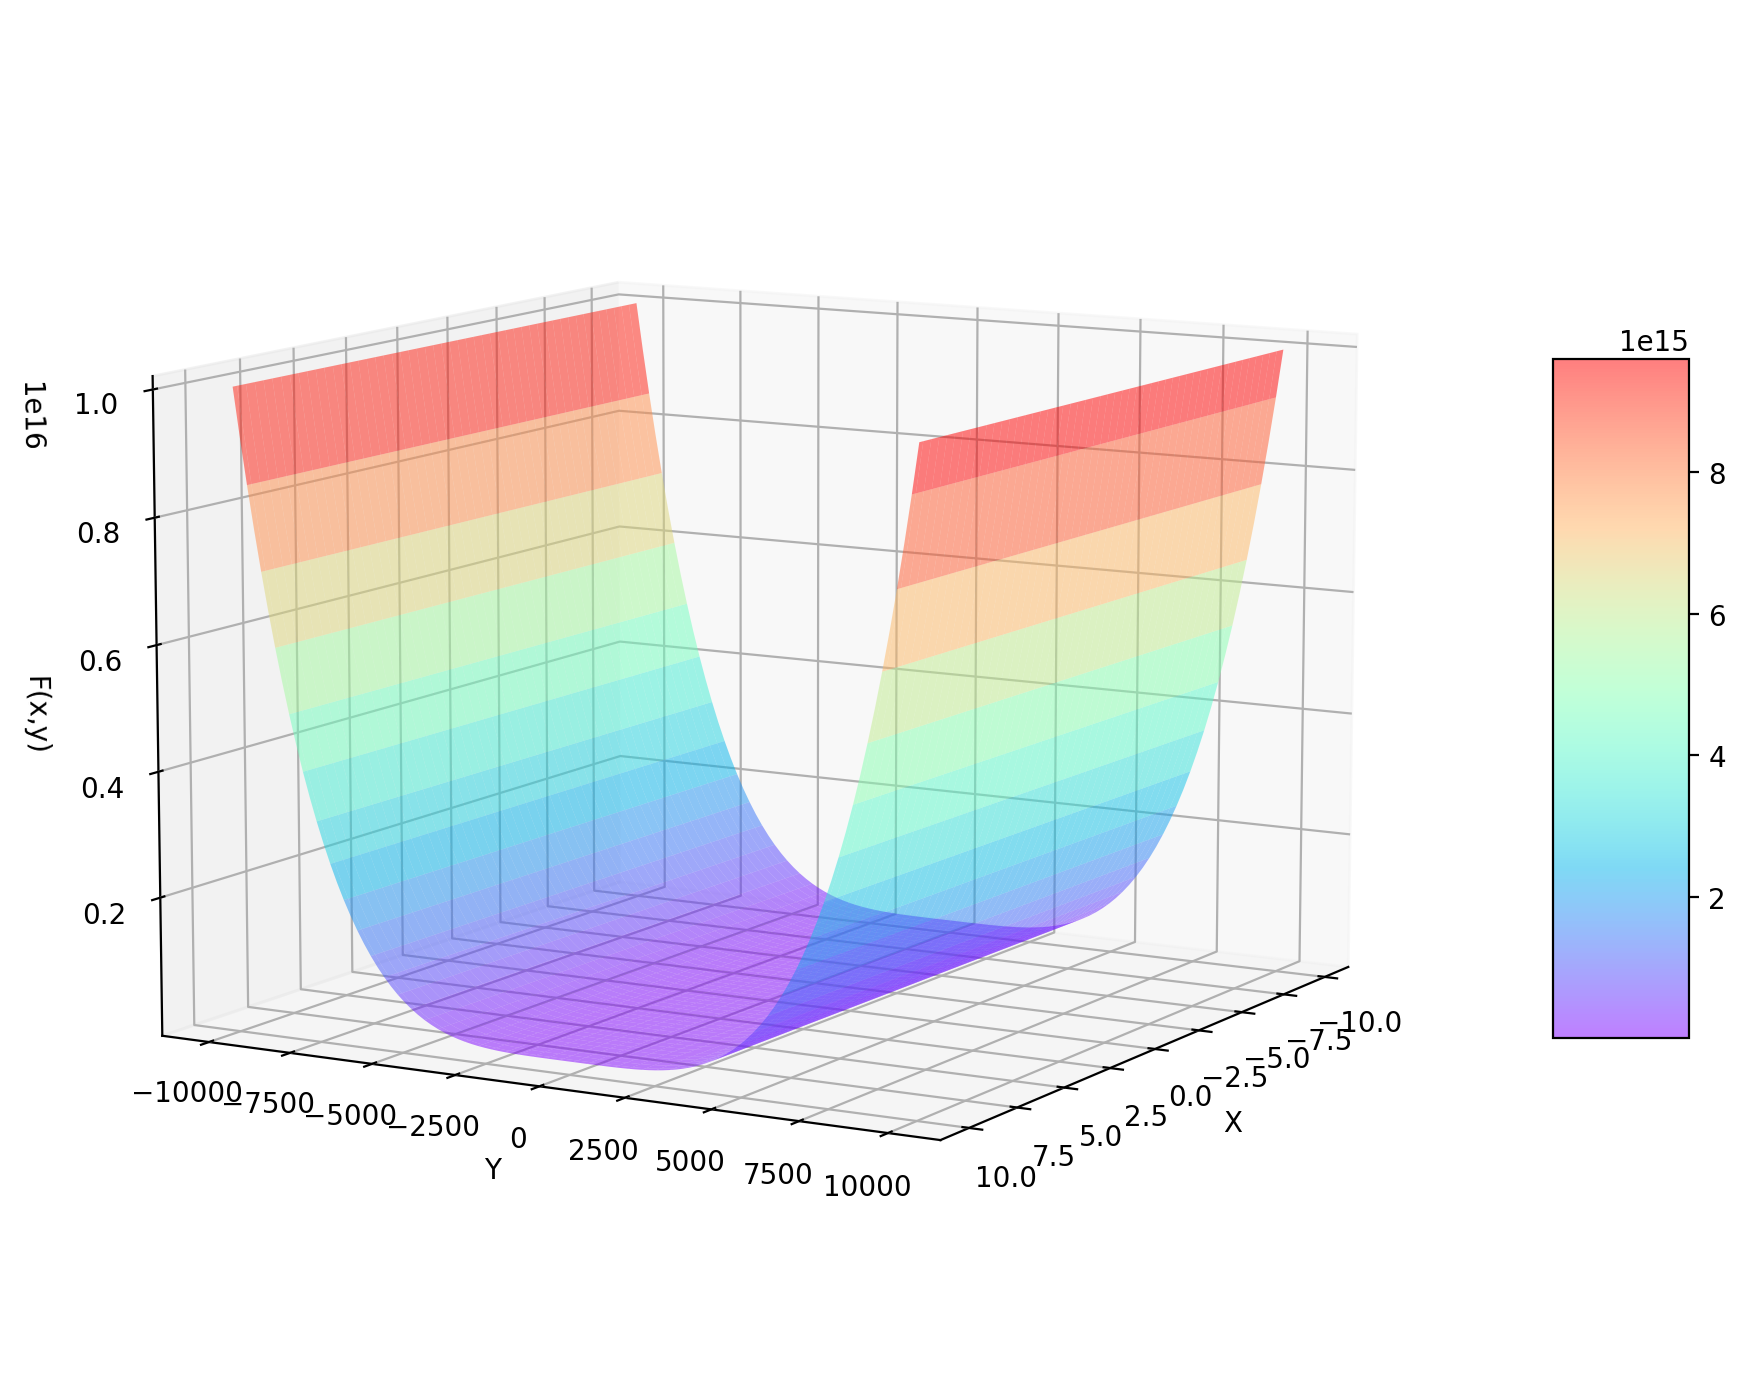

In [5]:
X, Y = np.meshgrid(x_interval, y_interval)
Z = func1b(X,Y) 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=200)
fig.set_size_inches(16, 9)
surf = ax.plot_surface( 
    X, Y, Z, cmap=cm.rainbow, linewidth=1, alpha=0.5, antialiased=True
)
fig.colorbar(surf, shrink=0.5, aspect=5)  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("F(x,y)")
ax.view_init(10,30)


## Aufgabe 2a
Die Funktion $f(x) = −x^{5}$ ist nicht koerziv auf $\mathbb{M} = (-\infty,1)$.
Gegenbeispiel: 
Die Folge $\{ x^k\} = 1 - \frac{1}{k}$ mit $\lim_{k \to \infty}\{ x^k\} = 1 \notin \mathbb{M}$ aber 
$\lim_{k \to \infty}\{ f(x^k)\} = -1 $

## Aufgabe 2b
Die Funktion $f(x) = 25x^{2} - 10x_{1}x_{2} + x_{2}^{4}$ ist nicht koerziv auf $\mathbb{R}^{2}$. 

Gegenbeispiel: Die Folge $\{ x^k\} = \{(\frac{k^{2}}{5}, k)\}  \implies f(x^{k}) = 0 ~\forall k \in \mathbb{N} $ obwohl $\lim_{k \to \infty} \parallel{x^{k}}\parallel= \infty$.

## Aufgabe 2c
Das Optimierungsproblem $$\mathbb{P}: \min_{x \in \mathbb{R}}25x^{2} - 10x_{1}x_{2} + x_{2}^{4}$$ ist lösbar. 
Wir haben: 

$f(x) = 25x_{1}^{2} - 10x_{1}x_{2}^{2} + x_{2}^{4} = (5x_{1} - x_{2}^{2})^{2} \geq 0 $ 

$\bar{x} = 0 \in \mathbb{R}^{2} \implies f(\bar{x}) = 0$  

$\implies \inf{f(x)} = 0 $

$\implies \bar{x}$ is ein globale Minimalpunkt.

## Aufgabe 2d
wir habe ein Gegenbeispiel: 

$f(x) = x^2$ und $\psi(y)=e^{-y}$
 $\implies (\psi \circ f) (x) = -e^{-x^2} < 0 ~\forall ~x \in \mathbb{R}$ 
 
 und $\forall \{{x^k} \} \subset \mathbb{R}\ \implies (\psi \circ f) (x) $ nicht koerziv weil
 
 $\{x^{k}\} = \{k\}$ und $\lim_{k \to \infty} \parallel x^{k} \parallel = \infty$ aber 
 
 $\lim_{k \to \infty}(\psi \circ f) (x^{k}) = 0 $

In [112]:
def func_f(x): return x**2
def func_psi(y): return -np.exp(-(y))


### Plot $f(x) = x^2$ is koerziv

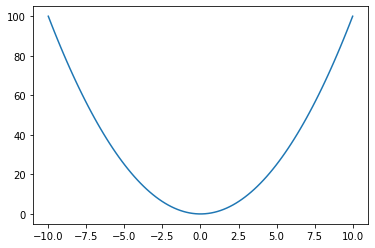

In [109]:
plt.plot(x_interval, func_f(x_interval))

### Plot $\psi(e^{-y})$ streng monoton wachsende Funktion

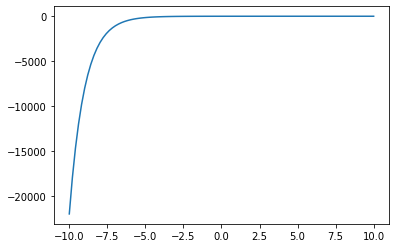

In [110]:
plt.plot(x_interval, func_psi(x_interval))

### Plot  $(\psi \circ f) (x)$ nicht koerziv

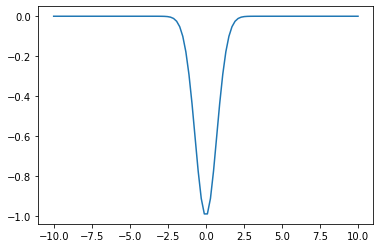

In [111]:
plt.plot(x_interval, func_psi(func_f(x_interval)))

# Aufgabe 3
Im ersten Schritt wird der Datensatz *cities* in Python geladen.


a) Das Problem ist konvex. Wie bewiesen in Aufgabe 4.5 ist die Norm-Funktion $\parallel \cdot \parallel $ konvex. Außerdem ist laut Aufgabe 4.1 die Summe von konvexen Funktionen multipliziert mit positiven Faktoren konve.  Da $\lambda_i > 0$ ist somit  $\lambda$ $ \parallel \cdot \parallel $ eine konvexe Funktion und die Summe von konvexen Funktionen $\sum_{i} ( \lambda \parallel \cdot \parallel)_{i} $ ist auch konvex.  





In [341]:
df = pd.read_excel('cities.xlsx')
df


,Stadt,p1,p2,lambda
0,Berlin,13.388860,52.517037,4.877305e-02
1,Hamburg,10.000654,53.550341,4.696683e-02
2,München,11.575382,48.137108,4.520576e-02
3,Köln,6.959974,50.938361,4.348927e-02
4,Frankfurt am Main,8.682092,50.110644,4.181680e-02
...,...,...,...,...
75,Salzgitter,10.359315,52.150372,1.190748e-05
76,Moers,6.628430,51.451283,6.096632e-06
77,Siegen,8.022723,50.874980,2.572016e-06
78,Hildesheim,9.951305,52.152164,7.620790e-07


b) Plotten Sie die Koordinaten der Städte (x-Achse Längengrad, y-Achse Breitengrad)

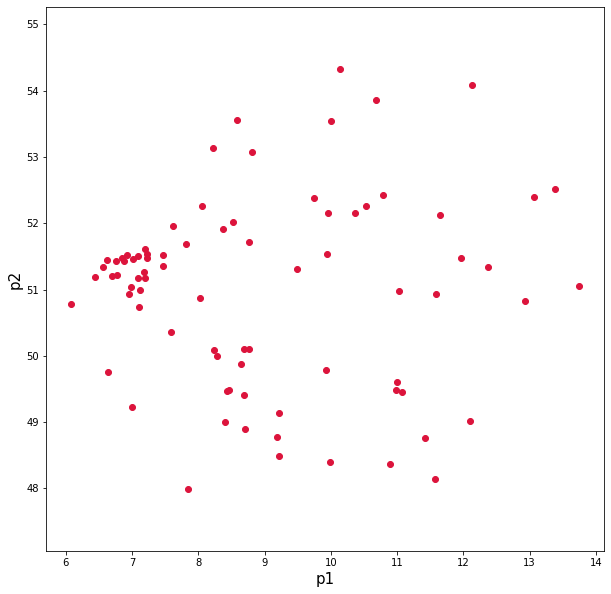

In [378]:
plt.figure(figsize=(10,10))
plt.scatter(df['p1'], df['p2'], c='crimson')
plt.xlabel('p1', fontsize=15)
plt.ylabel('p2', fontsize=15)
plt.axis('equal')
plt.show()

## c) 
Optimierungsmodell Formen Sie das Problem $\mathbb{P}^{l}_{\lambda}$ für $l = \infty$ in ein lineares Problem um und begründen Sie Ihre Umformulierungen.

$\mathbb{P}: \min_{x \in \mathbb{R}^{2}} F(x) =   \begin{bmatrix}
           \lVert z - p^{1} \rVert_{\infty} \\
           \lVert z - p^{2} \rVert_{\infty} \\
           \vdots \\
           \lVert z - p^{80} \rVert_{\infty}
         \end{bmatrix} $ also $M \in \mathbb{R}^2$ und
         
$f(z) = max_{i = 1, ..., 80} \lVert z - p^{i} \rVert_{\infty}$.
         
 Als Epigraphumformulierung erhält man das äquivalente Problem
 
 $\mathbb{P}_{epi}: \min_{z,\alpha} $ s.t $f(z) \leq \alpha$,
 
 wobei die Nebenbedingung von $\mathbb{P}_{epi}$ ausgeschrieben
 
 $\max_{i=1,..,80} \lVert z - p^{i} \rVert_{\infty} \leq \alpha$ lautet. Da das Maximum von 80 Zahlen genau dann unter der Schranke $\alpha$ liegt, wenn alle 80 Zahlen unter $\alpha$ liegen, lässt sich diese Restriktion äquivalent zu
 $$ \lVert z - p^{i}  \rVert_{\infty} \leq \alpha, i = 1,...,m,$$
 
 umformulieren und wir erhalten die Äquivalenz von $\mathbb{P}$ zu
 $$\mathbb{P}_{epi}: \min_{(z, \alpha)} \alpha  ~~ s.t ~~ \lVert z -p^{i}\rVert_{\infty} \leq \alpha, i = 1,...,m.$$
 
 Fassr man $\alpha$ als Radius auf, so versucht man also die Kugel mit Mittelpunkt $\tilde{z}$ und minimalem Radius $\tilde{\alpha}$ zu finden, die alle Punkte $p^{1},...,p^{80}$ enthält. 

## d) Optimierungsmodell
Hinweis: Für die Installation und den Umgang mit **gurobipy** oder **scipy** schauen Sie sich am besten die Einführungen im Ilias an.



Lösen Sie $P^l_{\lambda}$ mit $I=80$ und $l=\infty$.



Geben Sie einen optimalen Standort $x^*$ an und plotten Sie diesen in ihrem Plot aus Teil b).

In [352]:
from scipy.optimize import minimize
from numpy import linalg as LA
def min_func(x):
    ps = df[['p1','p2']].values
    lambda_vec = df['lambda'].values
    norm_vec = LA.norm(x - ps, np.inf, axis=1)
    return np.sum(norm_vec*lambda_vec)
x0 = [0,0]
sol = minimize(min_func, x0, method='Nelder-Mead', tol=1e-6)

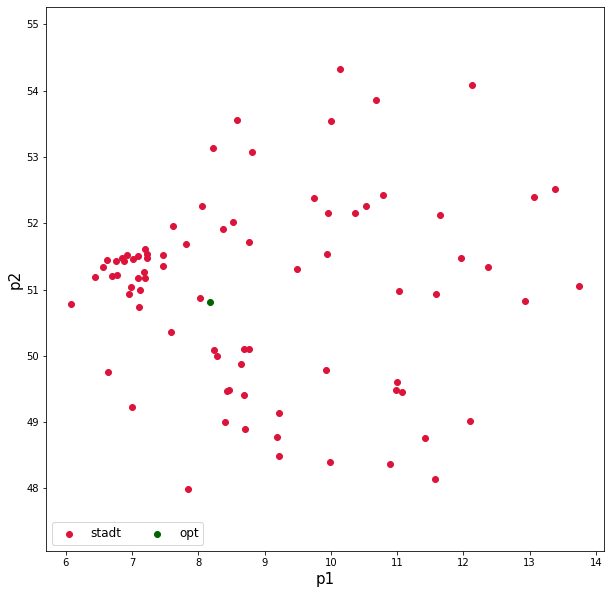

In [376]:
plt.figure(figsize=(10,10))
stadt = plt.scatter(df['p1'], df['p2'], c='crimson')
opt = plt.scatter(sol.x[0],sol.x[1], color='darkgreen', label= 'opt')
plt.xlabel('p1', fontsize=15)
plt.ylabel('p2', fontsize=15)
plt.legend((stadt, opt),
           ('stadt', 'opt'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=12)
plt.axis('equal')
plt.show()